# Skecher Footwear Data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def add_plot_source():
    plt.legend(['Source: CPSC Clearinghouse'], handlelength = 0, loc='upper right')

# Clearing House Data

In [3]:
# Loading in Dataset
clearing_house_df = pd.read_excel("Footwear_Data.xlsx")
print(clearing_house_df.shape)
print(list(clearing_house_df.columns))

(393, 33)
['INCIDENT ID', 'RECEIVED YEAR', 'RECEIVED MONTH', 'SOURCE', 'STATE', 'INCIDENT YEAR', 'INCIDENT MONTH', 'EXTERNAL CAUSE', 'PRODUCT 1', 'PRODUCT 1 HAZARD', 'PRODUCT 2', 'PRODUCT 2 HAZARD', 'PRODUCT 3', 'PRODUCT 3 HAZARD', 'VICTIM 1 GENDER', 'VICTIM 1 AGE YEARS', 'VICTIM 1 AGE MONTHS', 'VICTIM 1 INJURY', 'VICTIM 1 BODY PART', 'VICTIM 1 SEVERITY', 'VICTIM 2 GENDER', 'VICTIM 2 AGE YEARS', 'VICTIM 2 AGE MONTHS', 'VICTIM 2 INJURY', 'VICTIM 2 BODY PART', 'VICTIM 2 SEVERITY', 'VICTIM 3 GENDER', 'VICTIM 3 AGE YEARS', 'VICTIM 3 AGE MONTHS', 'VICTIM 3 INJURY', 'VICTIM 3 BODY PART', 'VICTIM 3 SEVERITY', 'INCIDENT DESCRIPTION']


In [4]:
# Filtering records with descriptions containing the word "SKECHER"
keyword = 'SKE'
skechers_df = clearing_house_df[clearing_house_df['INCIDENT DESCRIPTION'].str.contains(keyword, case = False, na = False)]
not_skechers_df = clearing_house_df[~clearing_house_df['INCIDENT DESCRIPTION'].str.contains(keyword, case = False, na = False)]
print(skechers_df.shape)
print(not_skechers_df.shape)
# Saving new raw dataset
skechers_df.to_csv('Skechers_Data.csv', index=False)
not_skechers_df.to_csv('Not_Skechers_Data.csv', index=False)

num_of_skecher_incidents = skechers_df.shape[0]
print(f'There are {num_of_skecher_incidents} skecher incidents reported')

(115, 33)
(278, 33)
There are 115 skecher incidents reported


In [5]:
# Duplicate check
duplicate_rows = skechers_df[skechers_df.duplicated(subset=skechers_df.columns.difference(['INCIDENT ID']), keep=False)]
num_of_dups = duplicate_rows.shape[0]
print(f'There are {num_of_dups} duplicate rows')

There are 0 duplicate rows


### Victim 1 Gender Data

VICTIM 1 GENDER
Female         96
Male           15
Unspecified     4


<function matplotlib.pyplot.show(close=None, block=None)>

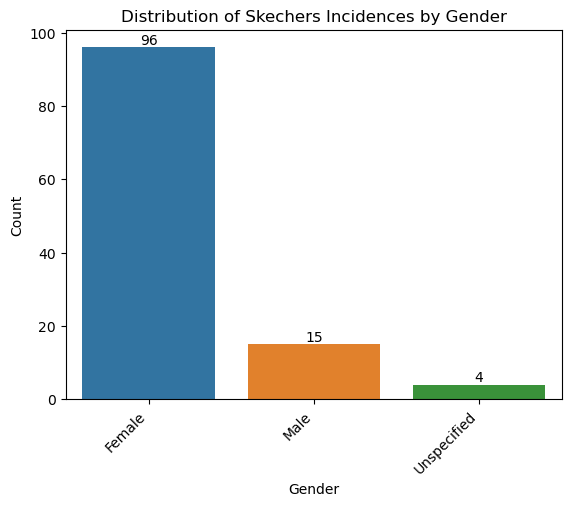

In [6]:
# Victim 1 Gender

# Datatable
skechers_df.loc[:,'VICTIM 1 GENDER'] = skechers_df['VICTIM 1 GENDER'].replace('Unknown', 'Unspecified')
gender_counts = skechers_df['VICTIM 1 GENDER'].value_counts()
print(gender_counts.to_string())

ax = sns.countplot(data=skechers_df, x='VICTIM 1 GENDER')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Skechers Incidences by Gender')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom')
plt.show

In [7]:
gender_counts.index.name = 'Gender'
print(gender_counts)
percentage = (gender_counts / gender_counts.sum() * 100).round(2)


table_data = pd.DataFrame({'Count': gender_counts, 'Percentage (%)': percentage})

# Use pandas styling to customize the appearance
styled_table = (table_data.style
    .format({'Percentage (%)': '{:.0f}%'})
    .set_table_attributes('style="display: block; overflow-x: auto;"')  # Hide index
    .set_caption('Distribution of Skechers Incidences by Gender'))

# Display the styled table
styled_table

Gender
Female         96
Male           15
Unspecified     4
Name: count, dtype: int64


,Count,Percentage (%)
Gender,,
Female,96,83%
Male,15,13%
Unspecified,4,3%


C:\Users\XAkers\AppData\Local\Temp\ipykernel_17356\3210443119.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(0.23, 1.01, f'Female\n{gender_counts[0]}', ha = 'center', va = 'center',
C:\Users\XAkers\AppData\Local\Temp\ipykernel_17356\3210443119.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(1.71, 1.09, f'Male\n{gender_counts[1]}', ha = 'center', va = 'center',
C:\Users\XAkers\AppData\Local\Temp\ipykernel_17356\3210443119.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Dat

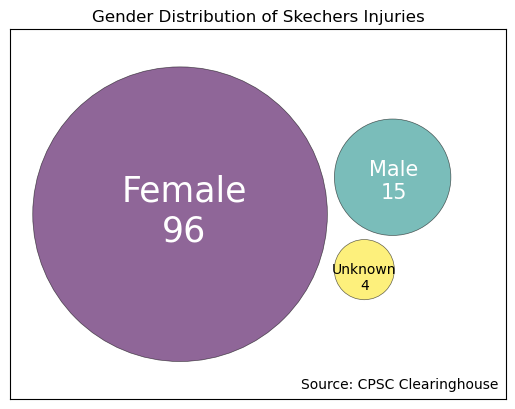

In [8]:
# Victim 1 Gender Bubble Chart

gender_counts = skechers_df['VICTIM 1 GENDER'].value_counts()
sizes = gender_counts / gender_counts.max() * 100
plt.title('Gender Distribution of Skechers Injuries')
plt.text(1.055, 0.53, 'Source: CPSC Clearinghouse')


positions = range(len(gender_counts))
plt.scatter([0.2, 1.7, 1.5], [1, 1.1, 0.85], s=sizes*450, alpha = 0.6, c=[0, 10, 20],
            cmap='viridis', edgecolors='black', linewidth=0.5)
plt.text(0.23, 1.01, f'Female\n{gender_counts[0]}', ha = 'center', va = 'center',
         color = 'white', fontsize= 25, fontweight='400')
plt.text(1.71, 1.09, f'Male\n{gender_counts[1]}', ha = 'center', va = 'center',
         color = 'white', fontsize = 15, fontweight='400')
plt.text(1.5, 0.83, f'Unknown\n{gender_counts[2]}', ha = 'center', va = 'center',
         color = 'black', fontsize = 10, fontweight='400')


plt.xticks([])
plt.yticks([])
plt.xlim(-1, 2.5)
plt.ylim(0.5, 1.5)
plt.show()


VICTIM 1 GENDER
Female         96
Male           15
Unspecified     4


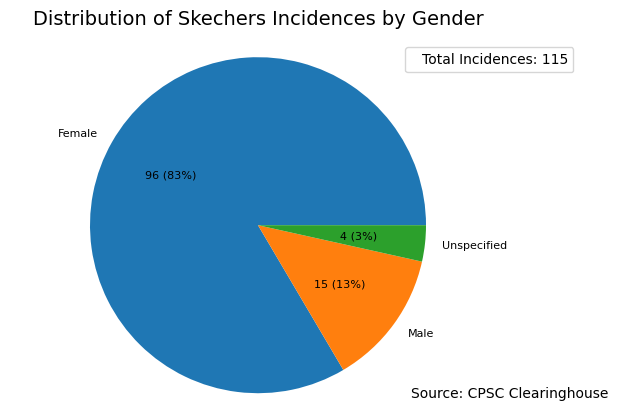

In [9]:
# Gender Distribution Pie Chart
gender_counts = skechers_df['VICTIM 1 GENDER'].value_counts()
print(gender_counts.to_string())

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%',
                                  labeldistance=1.1, counterclock=True, textprops={'fontsize':8})

plt.title('Distribution of Skechers Incidences by Gender', y = 1.02, fontsize=14)
plt.text(1.5, -1, 'Source: CPSC Clearinghouse', ha = 'center', va = 'center')

for label, autotext in zip(gender_counts.index, autotexts):
    count = gender_counts[label]
    percentage = gender_counts[label] / gender_counts.sum() * 100
    autotext.set_text(f'{count} ({percentage:.0f}%)')
    
plt.legend([f'Total Incidences: {gender_counts.sum()}'], handlelength=0, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.axis('equal')
plt.show()


### Age Group Data

C:\Users\XAkers\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


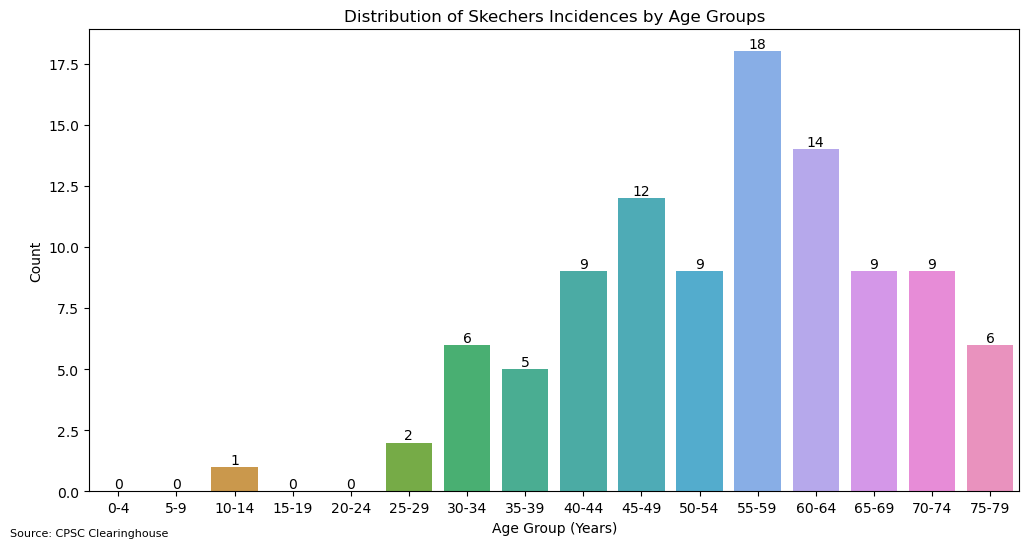

In [37]:
# Age Distribution

# Creating Age Groups
skechers_age_group_df = skechers_df
skechers_age_group_df = skechers_age_group_df.dropna(subset=['VICTIM 1 AGE YEARS'])
skechers_age_group_df.loc[:,'VICTIM 1 AGE YEARS'] = pd.to_numeric(skechers_age_group_df['VICTIM 1 AGE YEARS'], errors = 'coerce')
skechers_age_group_df = skechers_age_group_df.dropna(subset=['VICTIM 1 AGE YEARS']).astype({'VICTIM 1 AGE YEARS': int})
bin_width = 5
age_bins = list(range(0, skechers_age_group_df['VICTIM 1 AGE YEARS'].max() + bin_width, bin_width))
skechers_age_group_df['Age Group'] = pd.cut(skechers_df['VICTIM 1 AGE YEARS'], bins=age_bins, right=False)

# Data Table
age_groups_count = skechers_age_group_df['Age Group'].value_counts(sort=False)
formatted_index = [f"{intv.left}-{intv.right-1}" for intv in age_groups_count.index]
age_groups_count.index = formatted_index
# print(age_groups_count.to_string())

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=skechers_age_group_df, x='Age Group')
plt.xlabel('Age Group (Years)')
plt.ylabel('Count')
plt.title('Distribution of Skechers Incidences by Age Groups')
ax.set_xticklabels(age_groups_count.index, rotation=0, ha='center')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom')
plt.text(x=0, y=-0.09, s='Source: CPSC Clearinghouse', fontsize=8, ha='center', va='center', transform=plt.gca().transAxes)

plt.show()


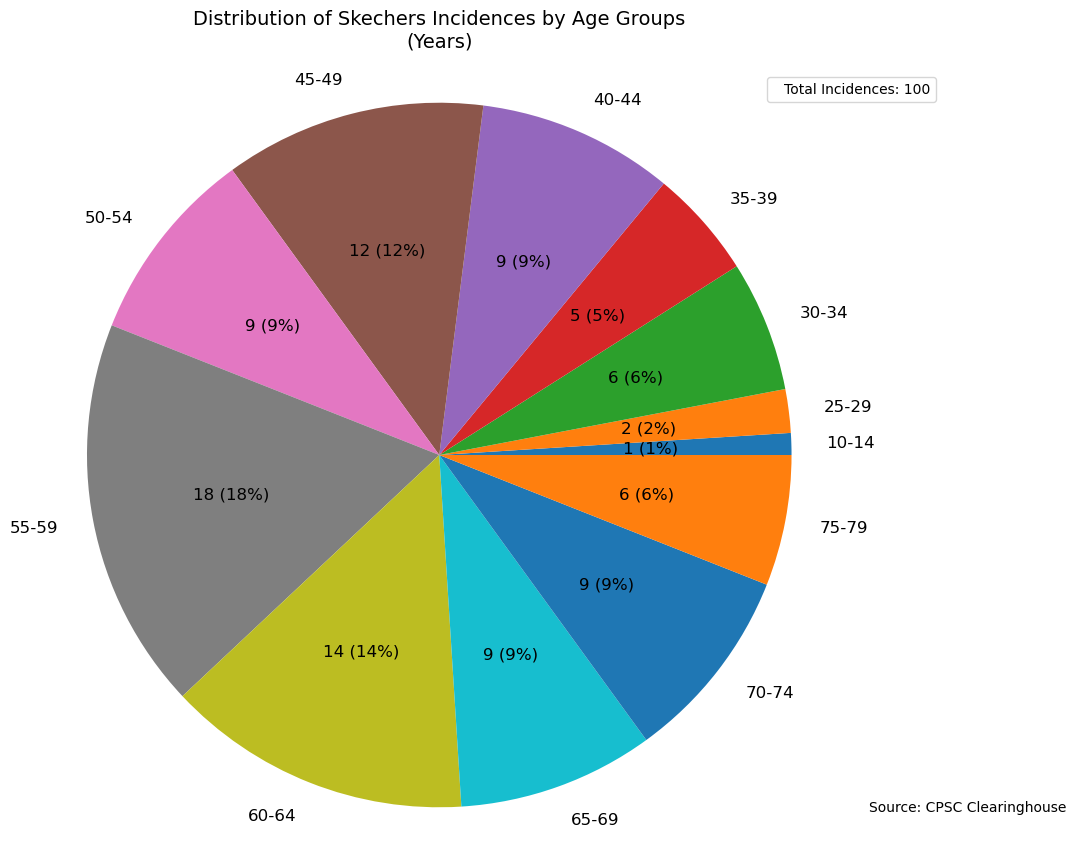

In [11]:
age_groups = age_groups_count[age_groups_count != 0]


fig, ax = plt.subplots(figsize=(10,10))
wedges, texts, autotexts = ax.pie(age_groups, labels=age_groups.index, autopct='%1.0f%%',
                                  labeldistance=1.1, counterclock=True, textprops={'fontsize':12})

plt.title('Distribution of Skechers Incidences by Age Groups\n(Years)', y = 1.02, fontsize=14)
plt.text(1.5, -1, 'Source: CPSC Clearinghouse', ha = 'center', va = 'center')

for label, autotext in zip(age_groups.index, autotexts):
    count = age_groups[label]
    percentage = age_groups[label] / age_groups.sum() * 100
    autotext.set_text(f'{count} ({percentage:.0f}%)')
    
plt.legend([f'Total Incidences: {age_groups.sum()}'], handlelength=0, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.axis('equal')
plt.show()

### Victim 1 Injury Type Data

VICTIM 1 INJURY
Concussion                1
Dislocation               1
Nerve Damage              1
Cut                       1
Internal Organ Injury     2
Unspecified               5
Bruising  Scratches       6
Strain / Sprain           8
Other/Not Stated         16
Break  Fracture          63


<function matplotlib.pyplot.show(close=None, block=None)>

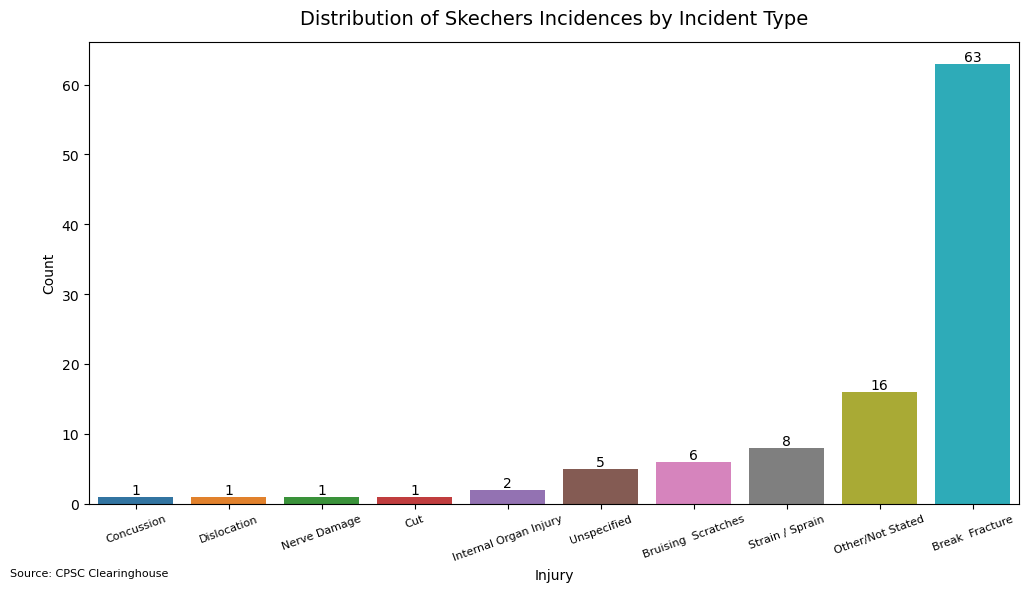

In [47]:
# Injury Type Data

# Datatable
injury_type_counts = skechers_df['VICTIM 1 INJURY'].value_counts(sort=True, ascending=True)
print(injury_type_counts.to_string())

# Bar Chart
plt.figure(figsize=(12,6))
ax = sns.countplot(data=skechers_df, x = 'VICTIM 1 INJURY', order=injury_type_counts.index)
plt.xlabel('Injury')
plt.ylabel('Count')
plt.title('Distribution of Skechers Incidences by Incident Type',y=1.02, fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20, ha = 'center', fontsize=8)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom')
plt.text(x=0, y=-0.15, s='Source: CPSC Clearinghouse', fontsize=8, ha='center', va='center', transform=plt.gca().transAxes)
plt.show

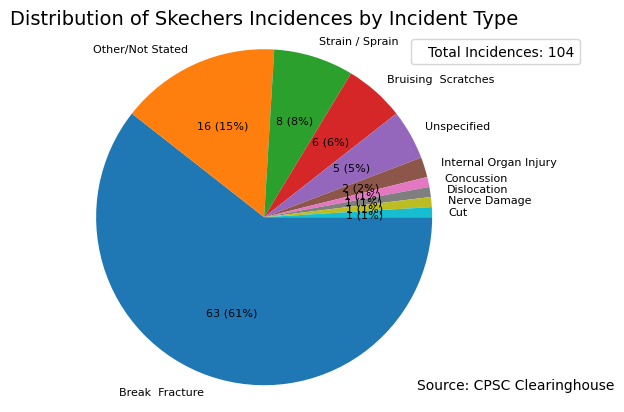

In [13]:
# Incident Type Pie Chart
incident_count = skechers_df['VICTIM 1 INJURY'].value_counts()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(incident_count, labels=incident_count.index, autopct='1.0f%%',
                                 labeldistance=1.1, counterclock=False, textprops={'fontsize':8})
plt.title('Distribution of Skechers Incidences by Incident Type', y = 1, fontsize=14)
plt.text(1.5, -1, 'Source: CPSC Clearinghouse', ha = 'center', va = 'center')
for label, autotext in zip(incident_count.index, autotexts):
    count = incident_count[label]
    percentage = incident_count[label] / incident_count.sum() * 100
    autotext.set_text(f'{count} ({percentage:.0f}%)')
plt.legend([f'Total Incidences: {incident_count.sum()}'], handlelength=0, loc='upper right', bbox_to_anchor=(1.15,1))


plt.axis('equal')
plt.show()

### Injury Severity Data

VICTIM 1 SEVERITY
Unspecified                                        1
No Incident  No Injury                             1
Level of care not known                            1
First Aid Received by Non-Medical Professional     2
Incident  No Injury                                3
No First Aid or Medical Attention Received         6
Seen by Medical Professional                      26
Hospital Admission                                33
Emergency Department Treatment Received           42


<function matplotlib.pyplot.show(close=None, block=None)>

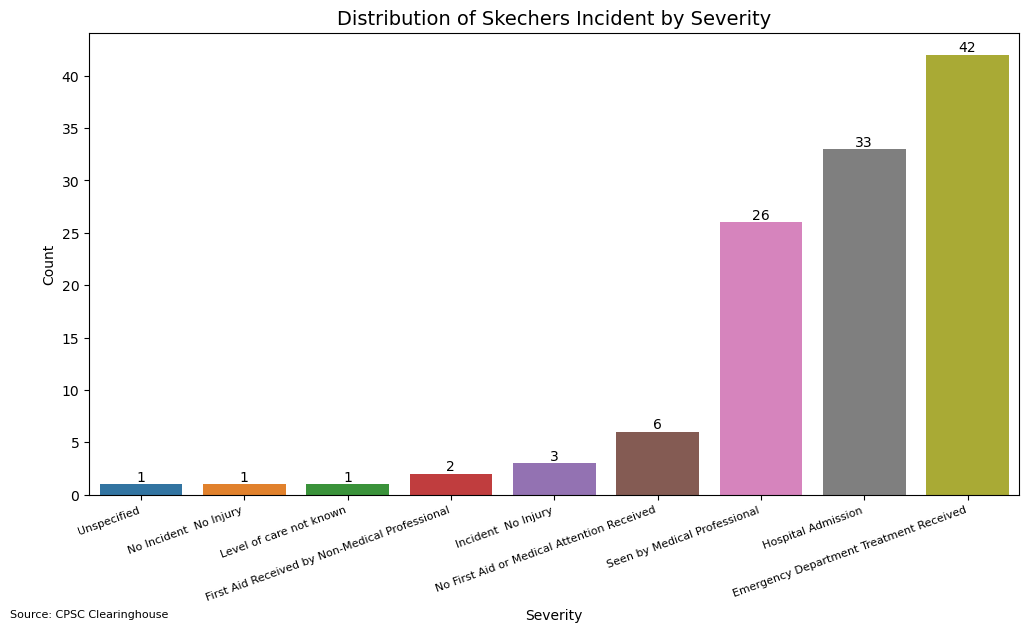

In [14]:
# Injury Severity
# Datatable
injury_severity_count = skechers_df['VICTIM 1 SEVERITY'].value_counts(sort=True, ascending=True)
print(injury_severity_count.to_string())

#Bar Chart
plt.figure(figsize=(12,6))
ax = sns.countplot(data=skechers_df, x = 'VICTIM 1 SEVERITY', order=injury_severity_count.index)
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Distribution of Skechers Incident by Severity', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20, ha = 'right', fontsize=8)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom')
plt.text(x=0, y=-0.26, s='Source: CPSC Clearinghouse', fontsize=8, ha='center', va='center', transform=plt.gca().transAxes)
plt.show

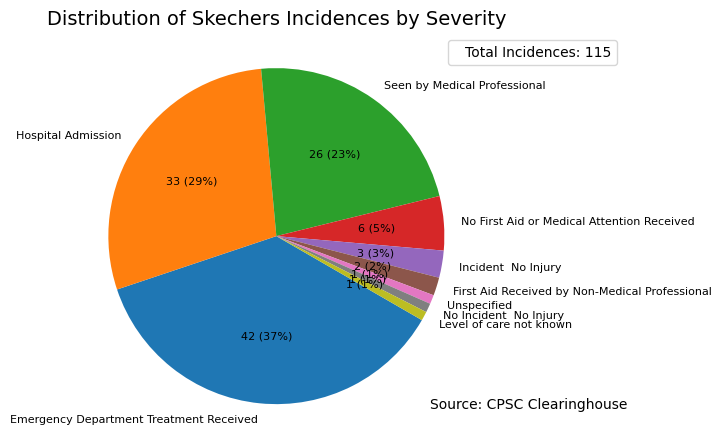

In [15]:
# Incident Severity Pie Chart
severity_count = skechers_df['VICTIM 1 SEVERITY'].value_counts()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(severity_count, labels=severity_count.index, autopct='%1.0f%%',
                                  labeldistance=1.1, counterclock=False, textprops={'fontsize':8}, startangle=-30)
plt.title('Distribution of Skechers Incidences by Severity', y = 1.05, fontsize=14)
plt.text(1.5, -1, 'Source: CPSC Clearinghouse', ha = 'center', va = 'center')
for label, autotext in zip(severity_count.index, autotexts):
    count = severity_count[label]
    percentage = severity_count[label] / severity_count.sum() * 100
    autotext.set_text(f'{count} ({percentage:.0f}%)')
plt.legend([f'Total Incidences: {severity_count.sum()}'], handlelength=0, loc='upper right', bbox_to_anchor=(1.2, 1.05))
plt.axis('equal')
plt.show()

### Body Part Injury Data

VICTIM 1 BODY PART
Elbow                                         1
Neck                                          1
Toe                                           1
25-50% of body                                1
Not Recorded                                  1
Unspecified                                   1
Finger                                        2
Head                                          3
Shoulder (including clavicle  collarbone)     4
Wrist                                         5
Arm                                           7
Knee                                          8
Leg                                          12
Foot                                         12
Trunk                                        14
Ankle                                        31
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

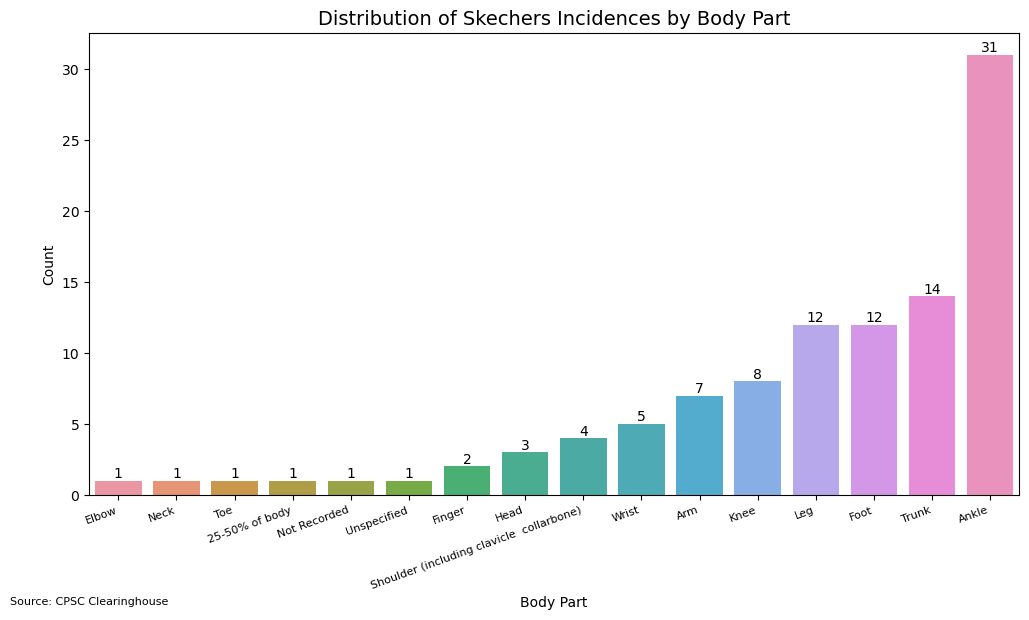

In [54]:
# Body Part Injury Data

# Datatable
body_part_injury_count = skechers_df['VICTIM 1 BODY PART'].value_counts(sort=True, ascending=True)
print(body_part_injury_count)

# Bar Chart
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=skechers_df, x = 'VICTIM 1 BODY PART', order=body_part_injury_count.index)
plt.xlabel('Body Part')
plt.ylabel('Count')
plt.title('Distribution of Skechers Incidences by Body Part', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20, ha = 'right', fontsize=8)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom')

plt.text(x=0, y=-0.23, s='Source: CPSC Clearinghouse', fontsize=8, ha='center', va='center', transform=plt.gca().transAxes)
plt.show

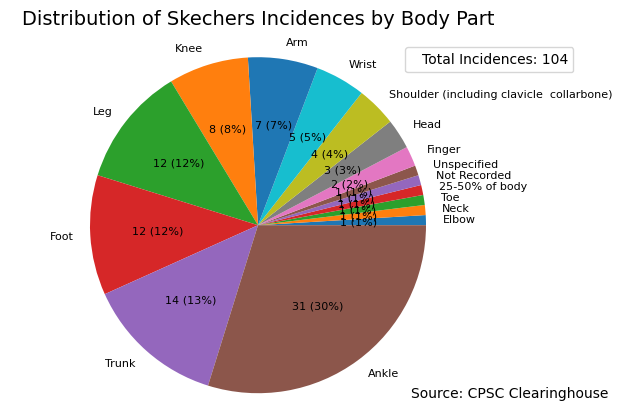

In [17]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(body_part_injury_count, labels=body_part_injury_count.index, autopct='%1.0f%%',
                                  labeldistance=1.1, counterclock=True, textprops={'fontsize':8})

plt.title('Distribution of Skechers Incidences by Body Part', y = 1.02, fontsize=14)
plt.text(1.5, -1, 'Source: CPSC Clearinghouse', ha = 'center', va = 'center')

for label, autotext in zip(body_part_injury_count.index, autotexts):
    count = body_part_injury_count[label]
    percentage = body_part_injury_count[label] / body_part_injury_count.sum() * 100
    autotext.set_text(f'{count} ({percentage:.0f}%)')
    
plt.legend([f'Total Incidences: {body_part_injury_count.sum()}'], handlelength=0, loc='upper right', bbox_to_anchor=(1.15, 1))
#plt.pie(age_groups, labels=age_groups.index, autopct=lambda p: f'{index}: {count} ({percentage:.0f}%)' for index, count, percentage in zip(age_groups.index, age_groups, age_groups/age_groups.sum()*100), 
 #       labeldistance=1.1, counterclock=True,
  #      textprops={'fontsize': 8})
plt.axis('equal')
plt.show()

### State Incident Data

STATE
FL    9
CA    9
OH    7
TX    6
WI    6
NC    4
MO    4
PA    4
NY    4
MD    3
MS    3
NJ    3
MN    3
CO    3
AZ    2
WA    2
OK    2
NM    2
MA    2
MI    2
IL    2
AL    2
TN    2
AR    1
OR    1
GA    1
LA    1
DE    1
VA    1
HI    1
SC    1
IA    1
SD    1
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

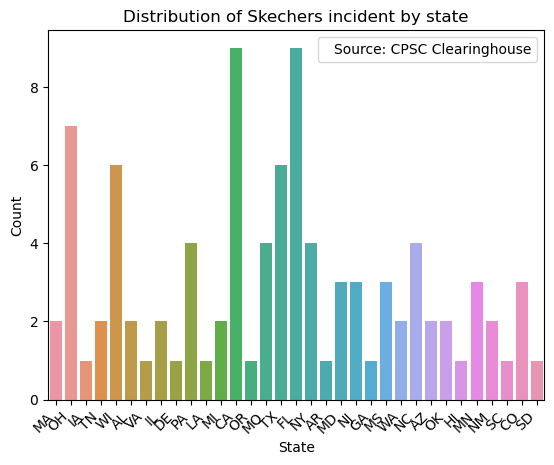

In [18]:
# State incident data

# Datatable
state_count = skechers_df['STATE'].value_counts()
print(state_count)

# Bar chart
sns.countplot(data=skechers_df, x = 'STATE')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Skechers incident by state')
plt.xticks(rotation = 45, ha = 'right')
add_plot_source()
plt.show

### Yearly Injuries Data

INCIDENT YEAR
2012.0    33
2011.0    31
2010.0    16
2013.0    12
2009.0     5
2014.0     4
2021.0     4
2019.0     3
2015.0     2
2017.0     2
2016.0     1
2018.0     1
2022.0     1
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

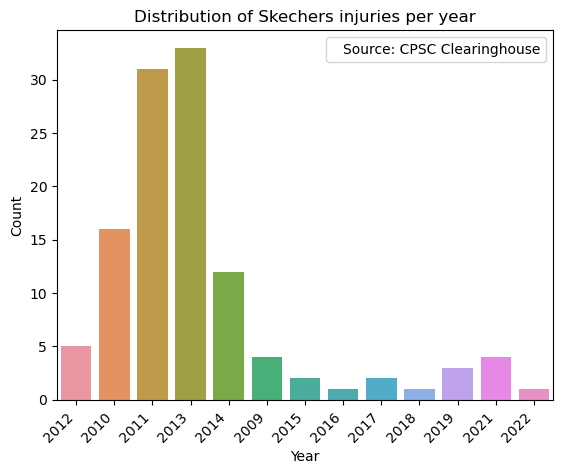

In [19]:
# Injuries per year data

# Datatable
year_count = skechers_df['INCIDENT YEAR'].value_counts()
print(year_count)

# Bar Chart

sns.countplot(data=skechers_df, x = 'INCIDENT YEAR')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Skechers injuries per year')
plt.xticks(rotation = 45, ha = 'right')
plt.xticks(range(len(skechers_df['INCIDENT YEAR'].unique())), [int(x) for x in skechers_df['INCIDENT YEAR'].unique()])
add_plot_source()
plt.show

### Injury Source Data

SOURCE
Consumer                   114
State Government Agency      1
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

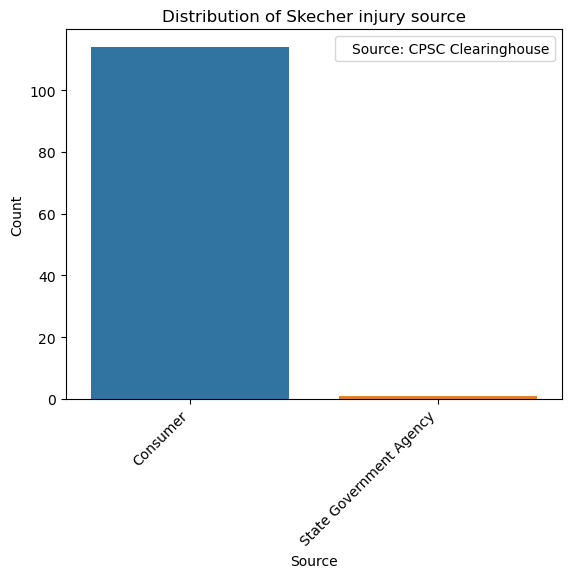

In [20]:
# Injury Source Data

# Datatable
source_count = skechers_df['SOURCE'].value_counts()
print(source_count)

# Bar Chart
sns.countplot(data=skechers_df, x = 'SOURCE')
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Distribution of Skecher injury source')
plt.xticks(rotation = 45, ha = 'right')
add_plot_source()
plt.show

0-4       0
5-9       0
10-14     1
15-19     0
20-24     0
25-29     2
30-34     6
35-39     5
40-44     9
45-49    12
50-54     9
55-59    18
60-64    14
65-69     9
70-74     9
75-79     6
Name: count, dtype: int64


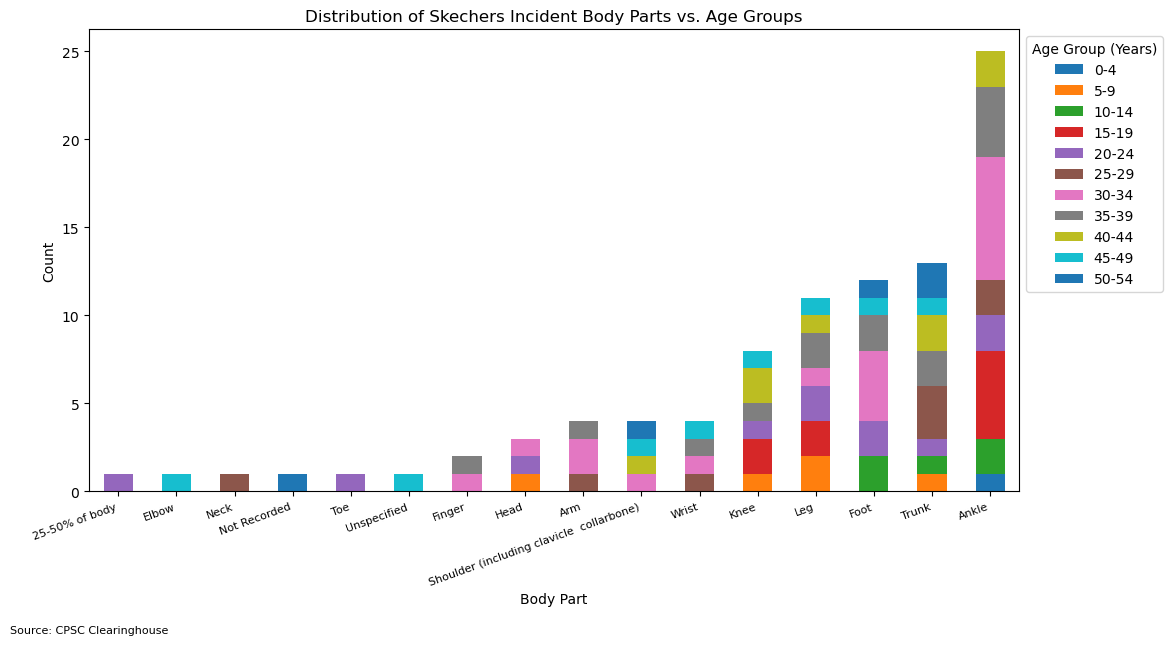

In [66]:
# Cross Table Age & Body Part
print(age_groups_count)
# skechers_age_group_df


age_body_ct = pd.crosstab(skechers_age_group_df['VICTIM 1 BODY PART'], skechers_age_group_df['Age Group'])
order = age_body_ct.sum(axis=1).sort_values().index
age_body_ct = age_body_ct.loc[order]
ax = age_body_ct.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribution of Skechers Incident Body Parts vs. Age Groups')
plt.xlabel('Body Part', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=20, ha='right', va='top', fontsize=8)
plt.legend(title='Age Group (Years)', bbox_to_anchor=(1,1), labels=age_groups_count.index)
plt.text(x=0, y=-0.3, s='Source: CPSC Clearinghouse', fontsize=8, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

In [77]:
age_body_ct

Age Group,"[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 70)","[70, 75)","[75, 80)"
VICTIM 1 BODY PART,,,,,,,,,,,
25-50% of body,0,0,0,0,1,0,0,0,0,0,0
Elbow,0,0,0,0,0,0,0,0,0,1,0
Neck,0,0,0,0,0,1,0,0,0,0,0
Not Recorded,0,0,0,0,0,0,0,0,0,0,1
Toe,0,0,0,0,1,0,0,0,0,0,0
Unspecified,0,0,0,0,0,0,0,0,0,1,0
Finger,0,0,0,0,0,0,1,1,0,0,0
Head,0,1,0,0,1,0,1,0,0,0,0
Arm,0,0,0,0,0,1,2,1,0,0,0


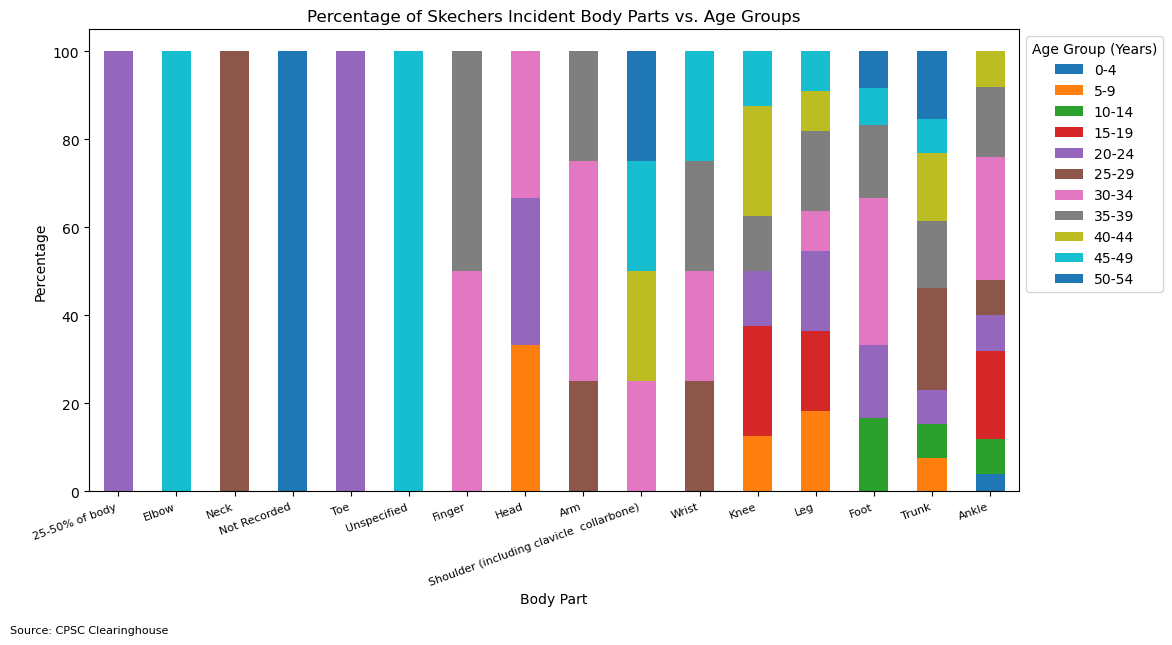

In [71]:
age_body_norm = age_body_ct.div(age_body_ct.sum(axis=1), axis=0) * 100
ax = age_body_norm.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Percentage of Skechers Incident Body Parts vs. Age Groups')
plt.xlabel('Body Part', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(rotation=20, ha='right', va='top', fontsize=8)
plt.legend(title='Age Group (Years)', bbox_to_anchor=(1,1), labels=age_groups_count.index)
plt.text(x=0, y=-0.3, s='Source: CPSC Clearinghouse', fontsize=8, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

0-4       0
5-9       0
10-14     1
15-19     0
20-24     0
25-29     2
30-34     6
35-39     5
40-44     9
45-49    12
50-54     9
55-59    18
60-64    14
65-69     9
70-74     9
75-79     6
Name: count, dtype: int64


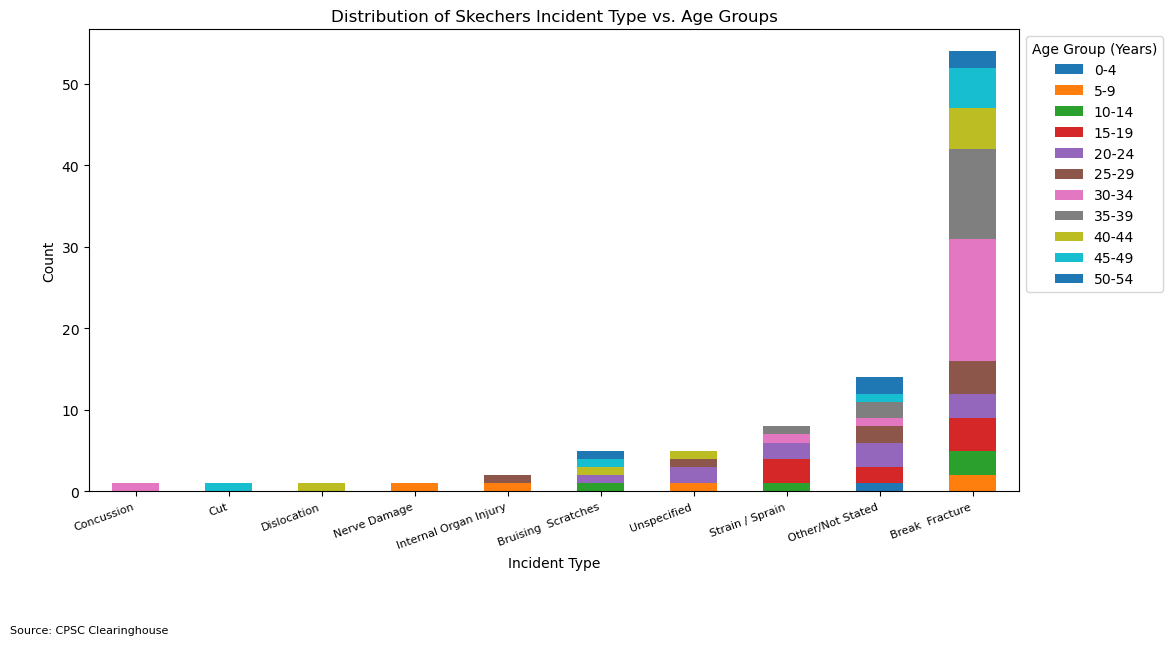

In [68]:
# Cross Age & Incident Type

# Cross Table Age & Body Part
print(age_groups_count)
# skechers_age_group_df

age_incident_ct = pd.crosstab(skechers_age_group_df['VICTIM 1 INJURY'], skechers_age_group_df['Age Group'])
order = age_incident_ct.sum(axis=1).sort_values().index
age_incident_ct = age_incident_ct.loc[order]
ax = age_incident_ct.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribution of Skechers Incident Type vs. Age Groups')
plt.xlabel('Incident Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=20, ha='right', va='top', fontsize=8)
plt.legend(title='Age Group (Years)', bbox_to_anchor=(1,1), labels=age_groups_count.index)
plt.text(x=0, y=-0.3, s='Source: CPSC Clearinghouse', fontsize=8, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

In [78]:
age_incident_ct

Age Group,"[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 70)","[70, 75)","[75, 80)"
VICTIM 1 INJURY,,,,,,,,,,,
Concussion,0,0,0,0,0,0,1,0,0,0,0
Cut,0,0,0,0,0,0,0,0,0,1,0
Dislocation,0,0,0,0,0,0,0,0,1,0,0
Nerve Damage,0,1,0,0,0,0,0,0,0,0,0
Internal Organ Injury,0,1,0,0,0,1,0,0,0,0,0
Bruising Scratches,0,0,1,0,1,0,0,0,1,1,1
Unspecified,0,1,0,0,2,1,0,0,1,0,0
Strain / Sprain,0,0,1,3,2,0,1,1,0,0,0
Other/Not Stated,1,0,0,2,3,2,1,2,0,1,2


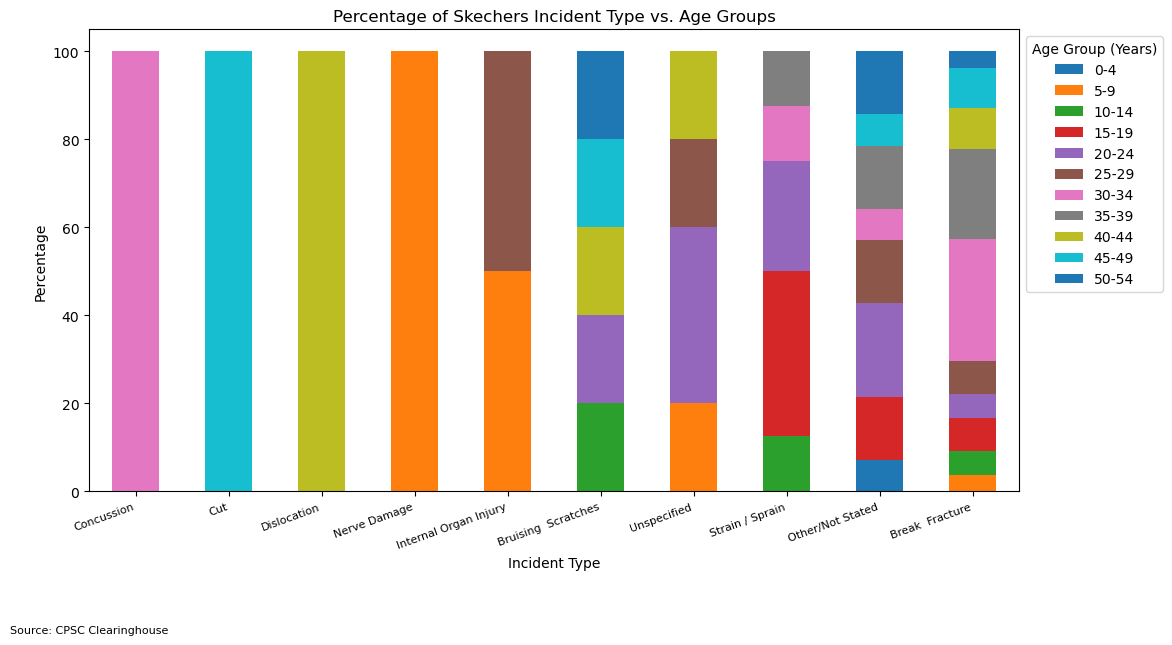

In [70]:
age_incident_norm = age_incident_ct.div(age_incident_ct.sum(axis=1), axis=0) * 100
ax = age_incident_norm.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Percentage of Skechers Incident Type vs. Age Groups')
plt.xlabel('Incident Type', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(rotation=20, ha='right', va='top', fontsize=8)
plt.legend(title='Age Group (Years)', bbox_to_anchor=(1,1), labels=age_groups_count.index)
plt.text(x=0, y=-0.3, s='Source: CPSC Clearinghouse', fontsize=8, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

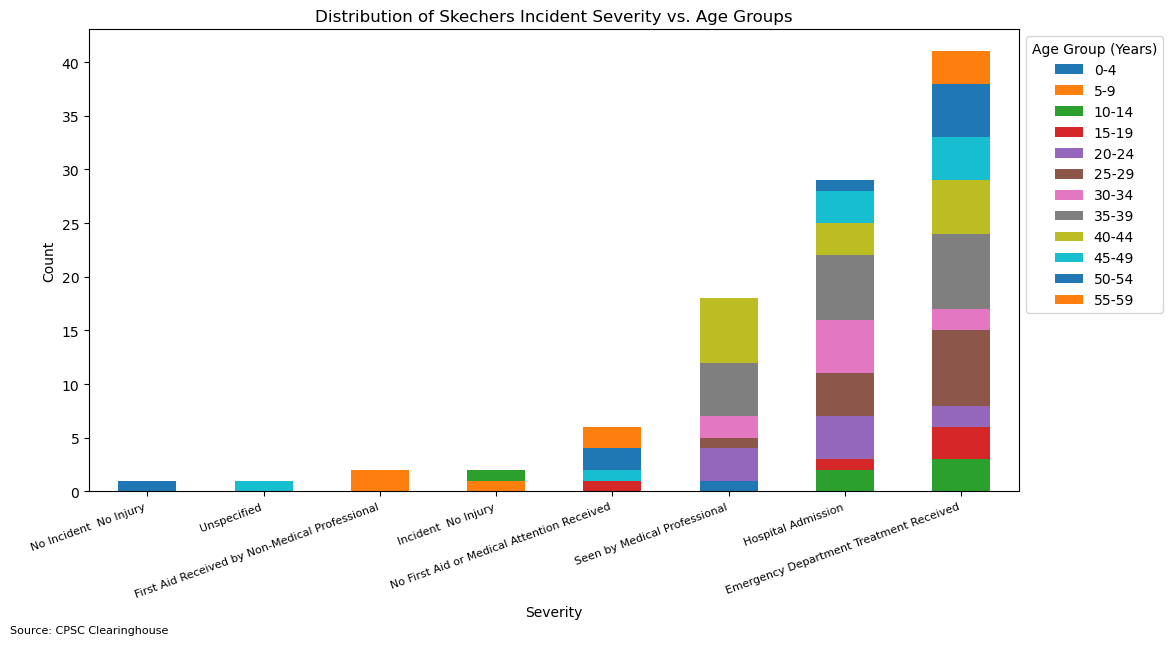

In [72]:
# Cross Age Severity

age_severity_ct = pd.crosstab(skechers_age_group_df['VICTIM 1 SEVERITY'], skechers_age_group_df['Age Group'])
order = age_severity_ct.sum(axis=1).sort_values().index
age_severity_ct = age_severity_ct.loc[order]
ax = age_severity_ct.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribution of Skechers Incident Severity vs. Age Groups')
plt.xlabel('Severity', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=20, ha='right', va='top', fontsize=8)
plt.legend(title='Age Group (Years)', bbox_to_anchor=(1,1), labels=age_groups_count.index)
plt.text(x=0, y=-0.3, s='Source: CPSC Clearinghouse', fontsize=8, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

In [79]:
age_severity_ct

Age Group,"[10, 15)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 70)","[70, 75)","[75, 80)"
VICTIM 1 SEVERITY,,,,,,,,,,,,
No Incident No Injury,0,0,0,0,0,0,0,0,0,0,1,0
Unspecified,0,0,0,0,0,0,0,0,0,1,0,0
First Aid Received by Non-Medical Professional,0,1,0,0,0,0,0,0,0,0,0,1
Incident No Injury,0,1,1,0,0,0,0,0,0,0,0,0
No First Aid or Medical Attention Received,0,0,0,1,0,0,0,0,0,1,2,2
Seen by Medical Professional,1,0,0,0,3,1,2,5,6,0,0,0
Hospital Admission,0,0,2,1,4,4,5,6,3,3,1,0
Emergency Department Treatment Received,0,0,3,3,2,7,2,7,5,4,5,3


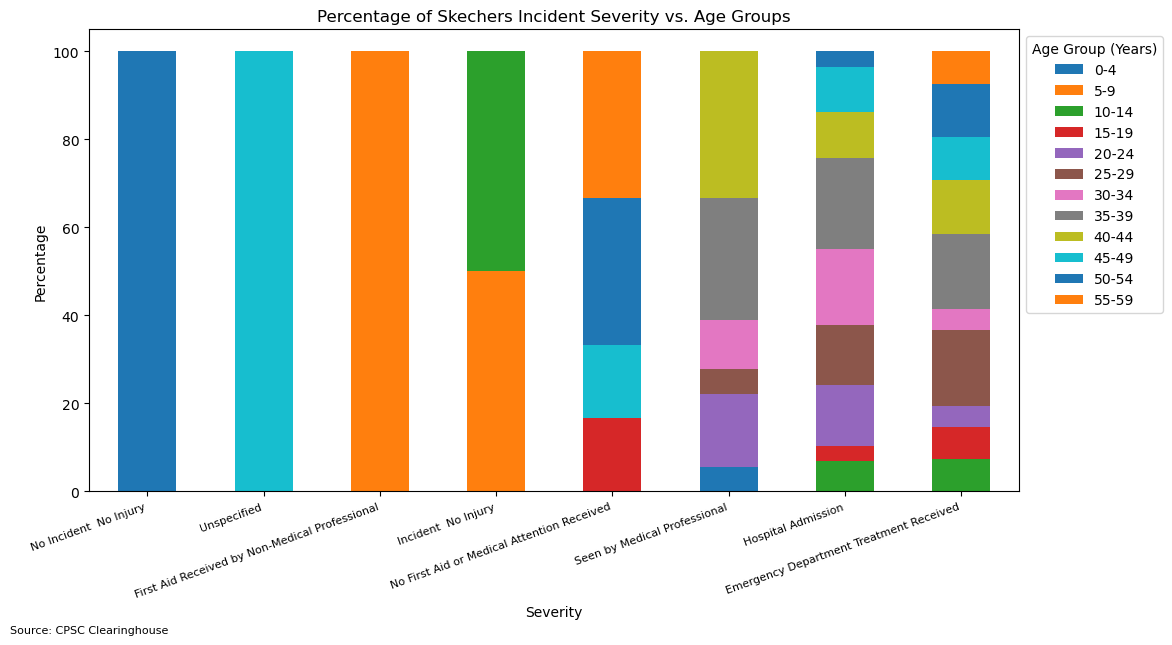

In [76]:
age_severity_norm = age_severity_ct.div(age_severity_ct.sum(axis=1), axis=0) * 100
ax = age_severity_norm.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Percentage of Skechers Incident Severity vs. Age Groups')
plt.xlabel('Severity', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(rotation=20, ha='right', va='top', fontsize=8)
plt.legend(title='Age Group (Years)', bbox_to_anchor=(1,1), labels=age_groups_count.index)
plt.text(x=0, y=-0.3, s='Source: CPSC Clearinghouse', fontsize=8, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

# Recall Data

In [21]:
recall_df = pd.read_excel('Footwear_data.xlsx', sheet_name = 'Recall Data')
print(recall_df.shape)
print(list(recall_df.columns))

(20, 18)
['Recall Number', 'Date', 'Recall Heading', 'Name of product', 'Description', 'Hazard Description', 'Remedy Type', 'Units', 'Incidents', 'Remedy', 'Sold At Label', 'Sold At', 'Importers', 'Manufacturers', 'Distributors', 'Manufactured In', 'Custom Label', 'Custom Field']


In [22]:
# Filtering out skechers
keyword = 'SKECHER'
skechers_recall_df = recall_df[recall_df['Name of product'].str.contains(keyword, case = False, na = False)]
#print(skechers_df.to_string)
skechers_recall_df.to_csv('Skechers_Recall_Data.csv', index = False)
num_of_skecher_recall_incidents = skechers_recall_df.shape[0]
print(f'There are {num_of_skecher_recall_incidents} skechers recall incidents reported')

There are 0 skechers recall incidents reported
